In [129]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [59]:
housedf = pd.read_csv(r'C:\Users\shruti chatur\Downloads\archive (1)\Bengaluru_House_Data.csv')

In [60]:
housedf.head() 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [61]:
housedf.shape

(13320, 9)

In [62]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [63]:
# Summary statistics of the dataset
print(housedf.describe())

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000


In [64]:
    for column in housedf.columns:
        print(housedf[column].value_counts())
        print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

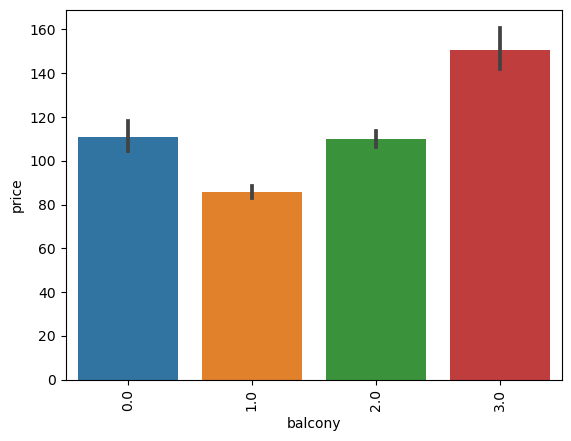

In [65]:
sns.barplot(x=housedf['balcony'], y=housedf['price'])
plt.xticks(rotation='vertical')
plt.show()

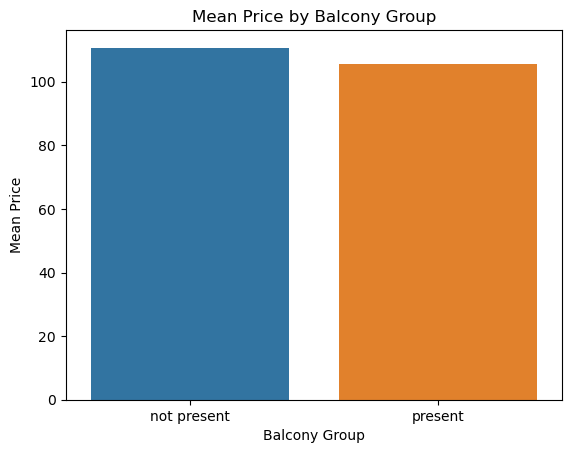

In [67]:
housedf['grouped_balcony'] = housedf['balcony'].apply(lambda x: 'present' if x in [1.0, 2.0, 3.0] else 'not present' if x==0.0 else None)
grouped_housedf = housedf.groupby('grouped_balcony')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_housedf['grouped_balcony'], y=grouped_housedf['price'])
plt.xlabel('Balcony Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by Balcony Group')
plt.show()

In [68]:
housedf['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

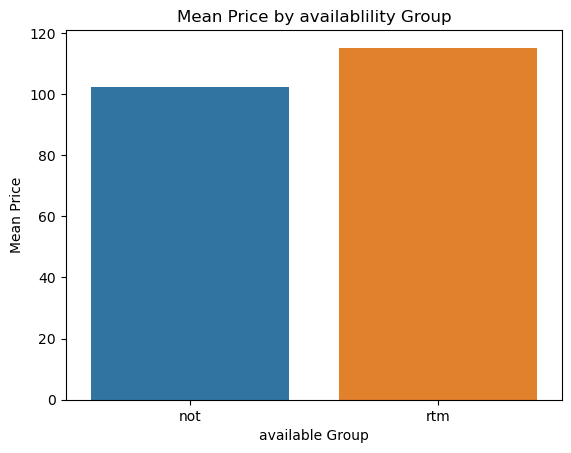

In [69]:
housedf['grouped_available'] = housedf['availability'].apply(lambda x: 'rtm' if x=='Ready To Move' else 'not')
grouped_housedf = housedf.groupby('grouped_available')['price'].mean().reset_index()

# Plotting the bar plot
sns.barplot(x=grouped_housedf['grouped_available'], y=grouped_housedf['price'])
plt.xlabel('available Group')
plt.ylabel('Mean Price')
plt.title('Mean Price by availablility Group')
plt.show()


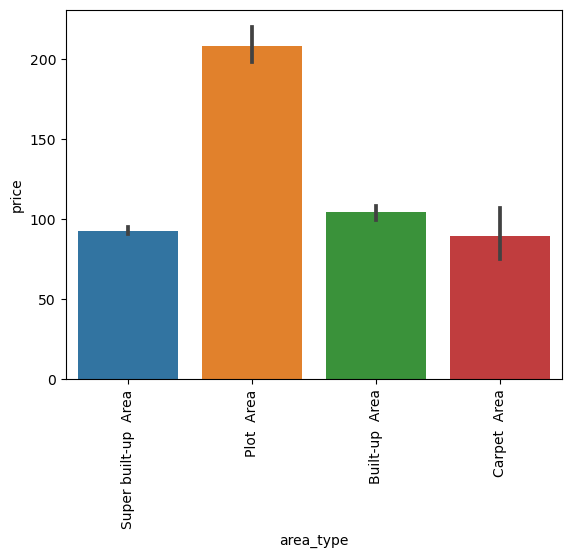

In [70]:
sns.barplot(x=housedf['area_type'], y=housedf['price'])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
housedf.drop(columns = ['balcony','society', 'grouped_balcony', 'grouped_available'], axis=1, inplace=True)

In [107]:
# Check for missing values
print(housedf.isnull().sum())

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
bhk             0
dtype: int64


In [72]:
housedf.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [73]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   price         13320 non-null  float64
dtypes: float64(2), object(5)
memory usage: 728.6+ KB


In [74]:
housedf['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [75]:
housedf['location'] = housedf['location'].fillna('Sarjapur Road')

In [76]:
housedf['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [77]:
housedf['size'] = housedf['size'].fillna('2 BHK')

In [78]:
housedf['bath']= housedf['bath'].fillna(housedf['bath'].median())

In [79]:
housedf['bhk'] = housedf['size'].str.split(" ").str[0].astype(int)

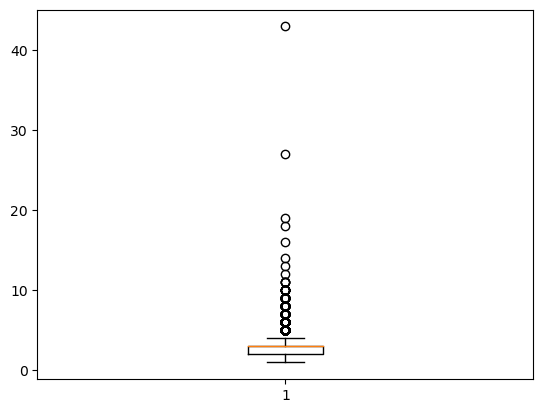

In [80]:
plt.boxplot(housedf['bhk'])
plt.show()

In [81]:
housedf[housedf['bhk']>20]

,area_type,availability,location,size,total_sqft,bath,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,660.0,43


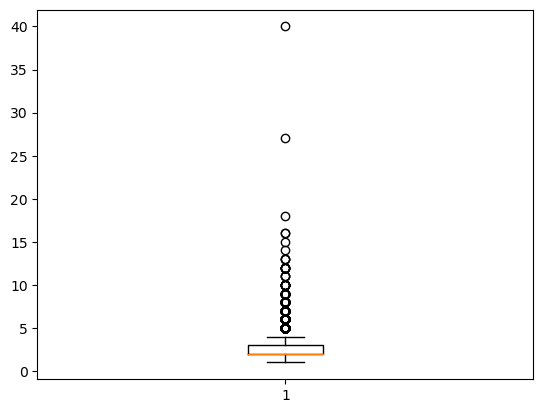

In [82]:
plt.boxplot(housedf['bath'])
plt.show()

In [83]:
#checking problamatic str values (ranges defined) in the total_sqft column

def check_str(val):
    try:
        float(val) 
    except:
        return True
    return False    

housedf[housedf['total_sqft'].apply(check_str)]

,area_type,availability,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [84]:
housedf.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [85]:
def convert_range(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None
        
housedf['total_sqft'] = housedf['total_sqft'].apply(convert_range)

In [86]:
#Feature Engineering
#Let's make a feature with price and total_sqft which we would be using to remove outlier
housedf['price_per_sqft'] = housedf['price']*100000/housedf['total_sqft']


In [87]:
housedf['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [88]:
housedf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [89]:
housedf.location = housedf.location.apply(lambda x : x.strip())
loc_val = housedf['location'].value_counts()
loc_val

location
Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: count, Length: 1295, dtype: int64

In [90]:
to_be_others = loc_val[loc_val.values<=10].index

In [91]:
housedf['location'] = housedf['location'].apply(lambda x: 'others' if x in to_be_others else x)

housedf['location'].value_counts()

location
others                2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [92]:
to_be_others

Index(['BTM 1st Stage', 'Nagadevanahalli', 'Basapura', 'Sector 1 HSR Layout',
       'Dairy Circle', 'Kalkere', 'Dodsworth Layout', '1st Block Koramangala',
       'Ganga Nagar', 'Gunjur Palya',
       ...
       'Housing Board Layout Vijay Nagar', 'Sarjapur Road',
       'Marathalli bridge', 'Papareddipalya', 'K R C kothanur',
       '1Channasandra', 'Hosahalli', 'Vijayabank bank layout',
       'near Ramanashree California resort', 'Abshot Layout'],
      dtype='object', name='location', length=1054)

In [93]:
housedf.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [94]:
#Outlier detection and removal
housedf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [95]:
housedf = housedf[housedf['total_sqft']/housedf['bhk']>=300]
housedf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [96]:
housedf.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [97]:
def remove_pps_outliers(housedf):
    housedf_out = pd.DataFrame()
    for key, val in housedf.groupby('location'):
        m = np.mean(val.price_per_sqft)
        std = np.std(val.price_per_sqft)

        gen_df = val[(val.price_per_sqft>=std-m) & (val.price_per_sqft<=std+m)]
        housedf_out = pd.concat([housedf_out,gen_df], ignore_index=True)

    return housedf_out

housedf = remove_pps_outliers(housedf)
housedf.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11103.000000,11103.000000,11103.000000,11103.000000,11103.000000
mean,1525.391171,2.464829,88.834776,2.572818,5525.930242
std,1216.540501,0.987584,84.369044,0.912931,2262.779737
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1102.000000,2.000000,47.000000,2.000000,4090.580899
50%,1278.000000,2.000000,65.000000,2.000000,5032.258065
75%,1645.000000,3.000000,98.000000,3.000000,6320.063898
max,52272.000000,16.000000,2200.000000,16.000000,24509.803922


In [98]:
def plot_scatter_chart(housedf,location):
    bhk2 = housedf[(housedf.location==location) & (housedf.bhk==2)]
    bhk3 = housedf[(housedf.location==location) & (housedf.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

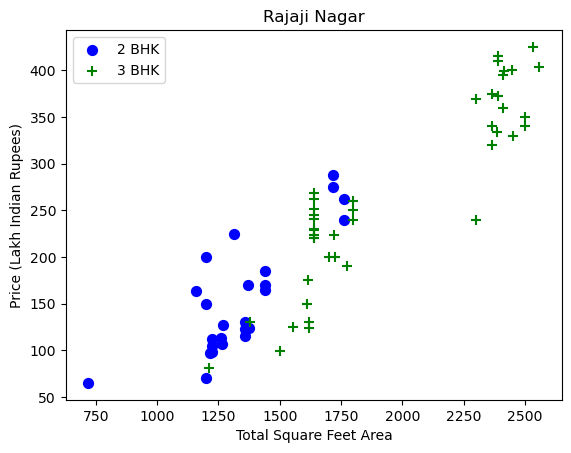

In [99]:
plot_scatter_chart(housedf,"Rajaji Nagar")

In [100]:
housedf.shape


(11103, 9)

In [101]:
def remove_bhk_outliers(housedf):
    exclude_indices = np.array([])
    for location, location_housedf in housedf.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_housedf in location_housedf.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_housedf.price_per_sqft),
                'std': np.std(bhk_housedf.price_per_sqft),
                'count': bhk_housedf.shape[0]
            }
        for bhk, bhk_housedf in location_housedf.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_housedf[bhk_housedf.price_per_sqft<(stats['mean'])].index.values)
    return housedf.drop(exclude_indices,axis='index')
housedf = remove_bhk_outliers(housedf)
housedf.shape

(8083, 9)

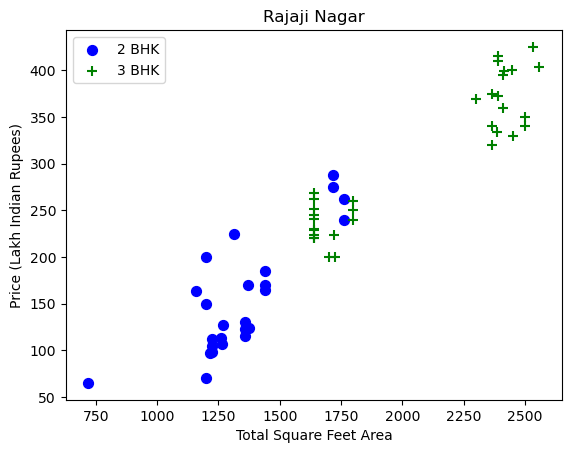

In [102]:
plot_scatter_chart(housedf,"Rajaji Nagar")

In [103]:
housedf.head()

,area_type,availability,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,Super built-up Area,Ready To Move,1st Block Jayanagar,2 BHK,1000.0,3.0,60.0,2,6000.000000
4,Built-up Area,15-Dec,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333


In [104]:
housedf.drop(['size', 'price_per_sqft'], axis=1, inplace= True)

In [105]:
housedf.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Super built-up Area,Ready To Move,1st Block Jayanagar,1000.0,3.0,60.0,2
4,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,130.0,3


In [106]:
housedf['area_type'].value_counts()

area_type
Super built-up  Area    5910
Built-up  Area          1486
Plot  Area               640
Carpet  Area              47
Name: count, dtype: int64

In [108]:
housedf['availability'] = housedf['availability'].apply(lambda x: 1 if x=='Ready To Move' else 0)

In [109]:
housedf.describe()

,availability,total_sqft,bath,price,bhk
count,8083.000000,8083.000000,8083.000000,8083.000000,8083.000000
mean,0.786218,1500.117396,2.450823,96.729594,2.505011
std,0.410000,907.872990,1.026812,91.462144,0.946120
min,0.000000,300.000000,1.000000,8.440000,1.000000
25%,1.000000,1092.000000,2.000000,49.010000,2.000000
50%,1.000000,1255.000000,2.000000,71.000000,2.000000
75%,1.000000,1668.500000,3.000000,110.000000,3.000000
max,1.000000,30000.000000,16.000000,2200.000000,16.000000


In [110]:
housedf.shape

(8083, 7)

In [111]:
housedf = housedf[housedf.bath<housedf.bhk+2]

In [112]:
housedf.head()

,area_type,availability,location,total_sqft,bath,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Super built-up Area,1,1st Block Jayanagar,1000.0,3.0,60.0,2
4,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,130.0,3


In [113]:
housedf.describe()

,availability,total_sqft,bath,price,bhk
count,7997.000000,7997.000000,7997.000000,7997.000000,7997.000000
mean,0.786295,1477.633682,2.412280,94.495599,2.489183
std,0.409947,868.204608,0.953635,86.352448,0.930442
min,0.000000,300.000000,1.000000,8.440000,1.000000
25%,1.000000,1090.000000,2.000000,49.000000,2.000000
50%,1.000000,1252.000000,2.000000,70.000000,2.000000
75%,1.000000,1650.000000,3.000000,110.000000,3.000000
max,1.000000,30000.000000,16.000000,2200.000000,16.000000


<Axes: >

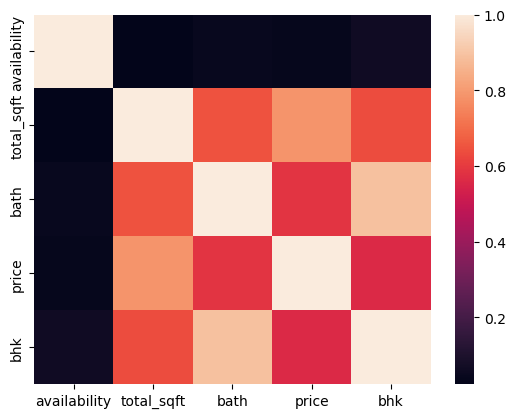

In [114]:
housedf.corr(numeric_only=True)['price']
sns.heatmap(housedf.corr(numeric_only=True))

In [115]:
X = housedf.drop(columns = ['price'])
y = housedf['price']


In [119]:
#Model building
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [120]:
print(X_train.shape)
print(X_test.shape)

(6397, 6)
(1600, 6)


In [121]:
X_train

,area_type,availability,location,total_sqft,bath,bhk
1191,Built-up Area,1,Bellandur,1350.0,2.0,2
7598,Super built-up Area,0,Tumkur Road,1246.0,2.0,2
7816,Plot Area,0,Varthur,1200.0,3.0,3
10447,Built-up Area,1,others,900.0,1.0,1
9965,Super built-up Area,0,others,1175.0,2.0,2
...,...,...,...,...,...,...
6043,Super built-up Area,1,Pattandur Agrahara,1550.0,2.0,3
3968,Super built-up Area,0,Jakkur,850.0,1.0,2
1985,Super built-up Area,1,Doddathoguru,1549.0,3.0,3
3196,Built-up Area,1,Hegde Nagar,3000.0,7.0,6


In [130]:
step1 = ColumnTransformer(transformers=[
                         ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'),[0,2])
                 ], remainder='passthrough')
step2 = StandardScaler() 
step3 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2),
    ('step3', step3)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("R2 score ", r2_score(y_test, y_pred))
print("MAE score ", mean_absolute_error(y_test, y_pred))

R2 score  0.7877405004606123
MAE score  20.528753225527584
